<a href="https://colab.research.google.com/github/Manisha2408/Airbnb-booking-Analysis-EDA-/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly 
import missingno as msno


In [ ]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Give path to access data
path= '/content/drive/MyDrive/Colab Notebooks/capstone project/Airbnb NYC 2019.csv'

In [ ]:
# Read files using pandas module.
airbnb = pd.read_csv(path)

#Understand The Data
>Here we will understand properties and structure of data

In [ ]:
# Read the first five rows in data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Read the last five rows of data.
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Check the shape of data.
airbnb.shape

(48895, 16)

In [ ]:
# Check the information in data.
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Check columns in data.
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Check discription of data.
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Data Cleaning

In [ ]:
# Here we will delete unnecessary column like id ,name , host_name, last_review, 
airbnb.drop(['id','name', 'host_name','last_review'],axis=1,inplace=True)
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# here we will check Nan value or missing value in our data set.
airbnb.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

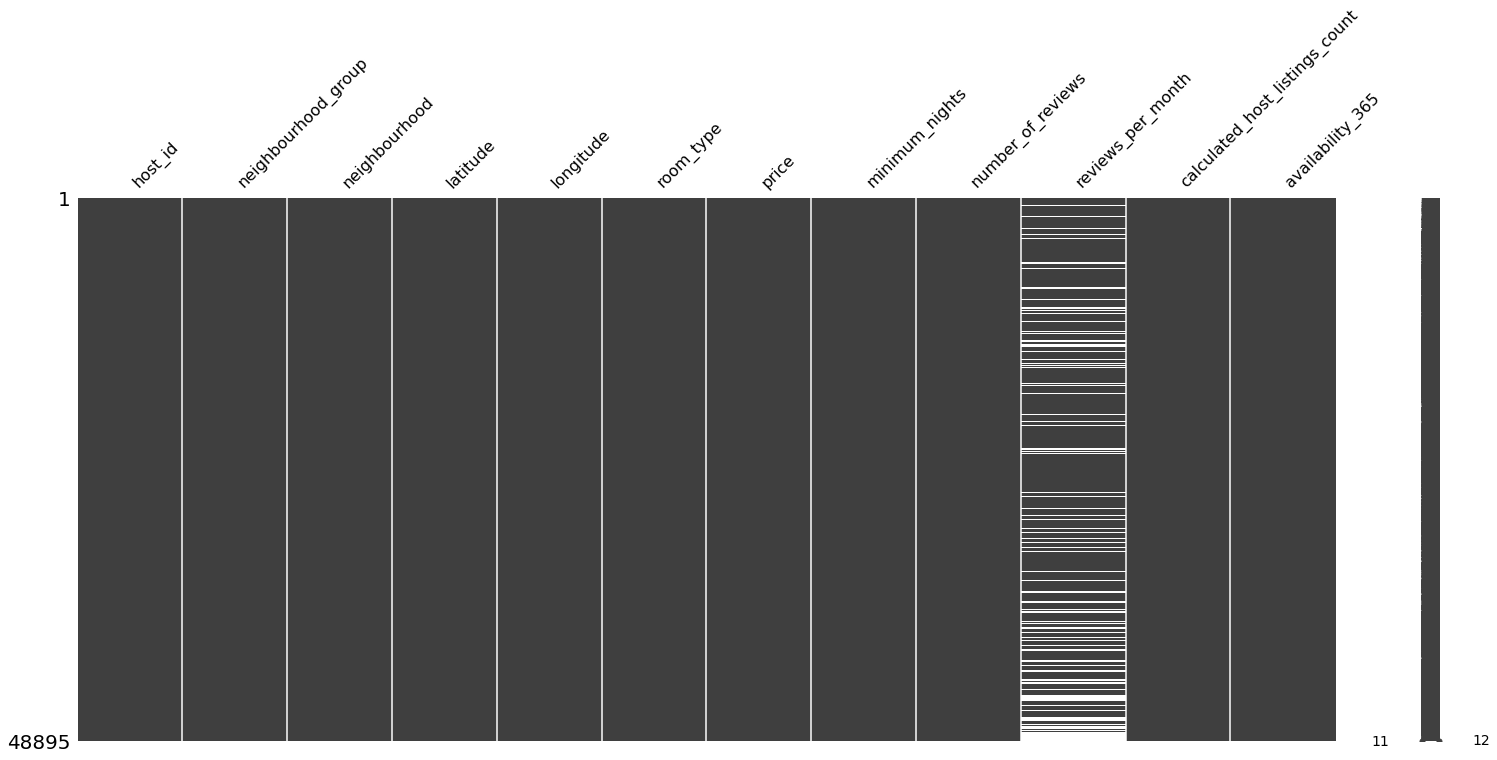

In [ ]:
#The matrix below shows the nan values in each of the feature of the data
# The horizontal white line in each columns represents the nan value
# The column of reviews_per_month contains the most nan values
msno.matrix(airbnb)

In [ ]:
# Here we will replace all missing values in 'reviews-per_month'with zero.
airbnb['reviews_per_month'].fillna(0,inplace=True) 
airbnb

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [ ]:
# let us check is there any missing value remain in our data.
airbnb.isnull().any()
# 'False' for every category means no missing values. 

host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

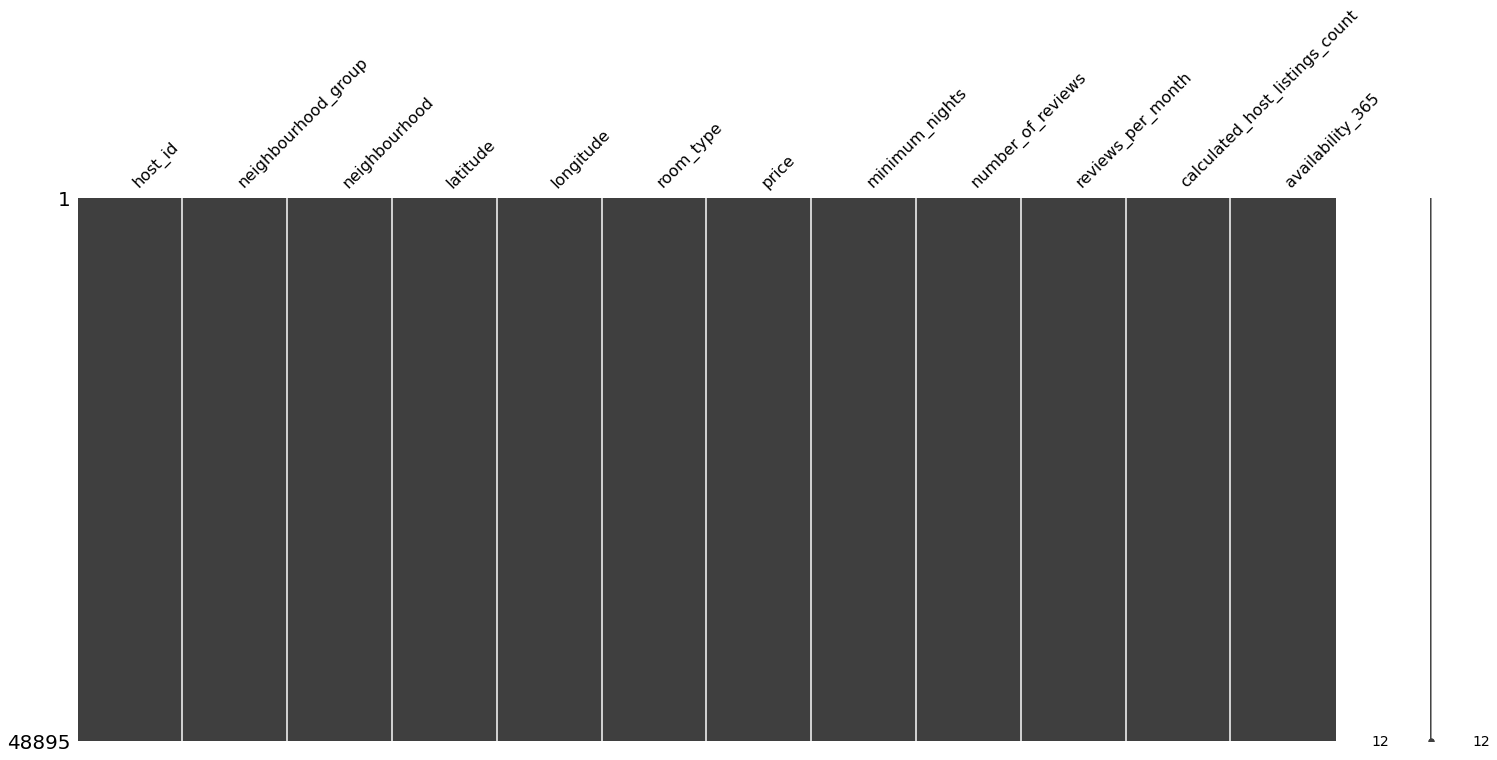

In [ ]:
#The matrix below shows the nan values in each of the feature of the data
# The horizontal white line in each columns represents the nan value
# The column of reviews_per_month contains the most nan values
msno.matrix(airbnb)

In [ ]:
# let us check shape of our dataframe now.
airbnb.shape

(48895, 12)

#Exploring and Visualising The Data

Here we will explore and visualise data in order to discover key understandings like differernt hosts and areas, busiest host, effect of loctation, price and reviews on bookings and corelation between location, price,reviews,noticeble difference in traffic among differrent areas,price distribution,room types available most expensive neighbourhood group etc.


In [ ]:
# Let us find unique areas in data using 'neighbourhood'column.
airbnb.neighbourhood.unique() 

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
# Let us find total count of areas (neighbourhood)  in dataset
len(airbnb.neighbourhood.unique())

221

There are total 221 neighbourhoods (areas) in given dataset

   Let us find Top listing areas i.e. areas where number of listings are maximum using 'neighbourhood' column in our dataset.

In [ ]:
# Let us first find total number of hosts in dataset
Number_of_hosts=airbnb.host_id.unique()
Number_of_hosts

array([     2787,      2845,      4632, ..., 274321313,  23492952,
        68119814])

In [ ]:
len(Number_of_hosts)

37457

There  are total 37457 hosts in given dataset.

In [ ]:
top_host_id = airbnb['host_id'].value_counts().head(10)
top_host_id

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
top_host_id.sum()

1270

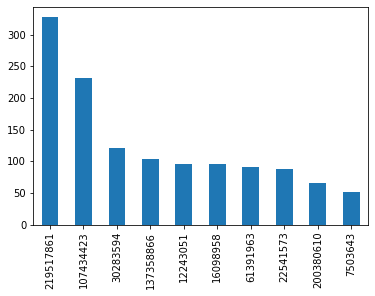

In [ ]:
# let us visualize  top_host_id using bar chart.
top_host_id.plot (kind='bar')
plt.title=('top_10 host_id')
plt.ylabel=('count')
plt.xlabel=('host_id')


From above bar chart it is observed that host with host_id = 219517861 has 327 listings also hosts with host_id 12243051,16098958 have same number of listings 

# let us find correlation between columns

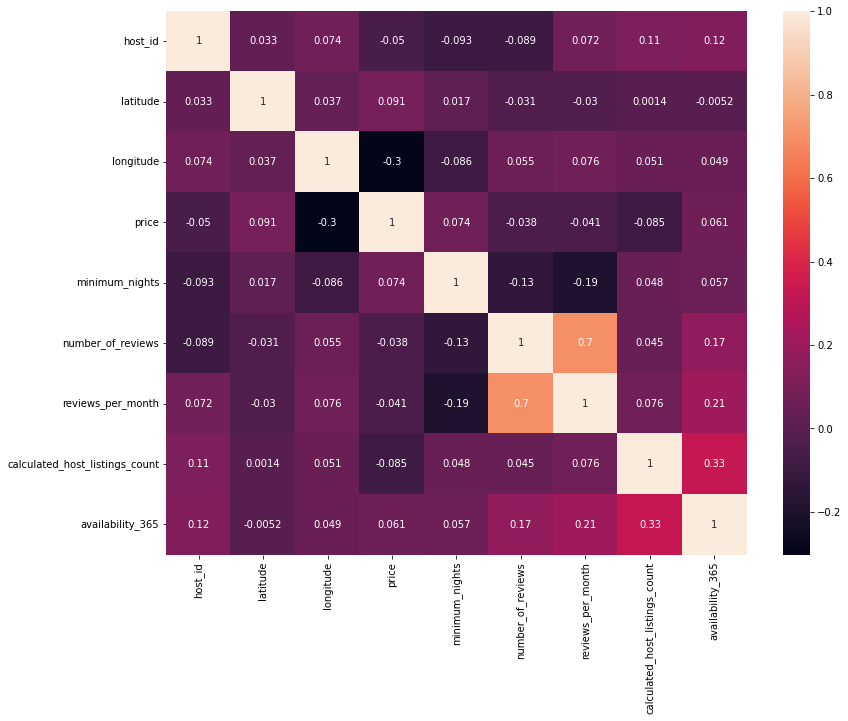

In [ ]:
# Let us see correletion between the predictions such as location, price, reviews
corr=airbnb.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title=('correlation between location, price,reviews\n')
sns.heatmap(corr,annot=True)
plt.show()

From above corelation plot it is observed that there is no strong corelation between any factors but calculated_host_listing_count and Availability_365 are weakly corelated.

* Top most location with maximum number of listings

In [ ]:
# Let us find topmost location which has maximum nuber of listings in given data.
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
locations = airbnb['neighbourhood_group'].value_counts()
locations

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
len(locations)

5

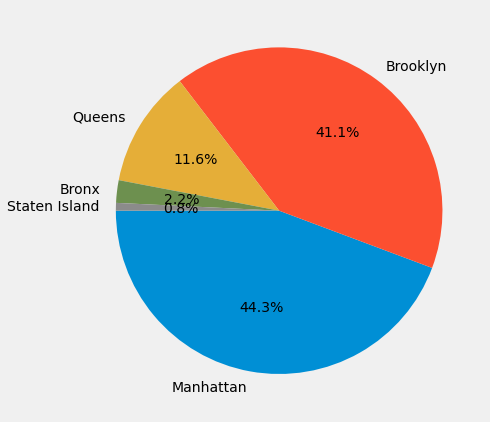

In [ ]:
#Visualise number of listings  in different locations with help of pie chart.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title=("neighbourhood group")
g=plt.pie(airbnb.neighbourhood_group.value_counts(),labels=airbnb.neighbourhood_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show()

from above pie chart it is observed that maximum number of listings in NewYark  are found in 'Manhatten(44.3%) of total listings

Let us see relation between neighbourhood_group i.e. location and price with the help of barplot 

In [ ]:
# let us find relation between location i.e.neighbourhood_group and price.
price_vs_location = airbnb.groupby(['neighbourhood_group'])['price'].mean()
price_vs_location

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

Text(0, 0.5, 'price')

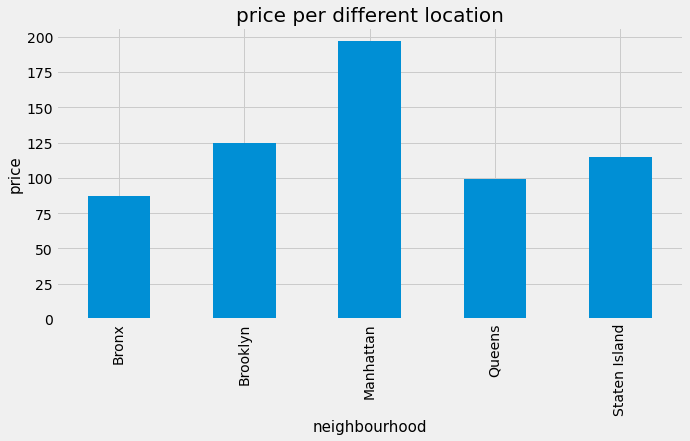

In [ ]:
# Let us visualise price_vs_location .
ax= price_vs_location.plot.bar(figsize=(10,5),fontsize=14)
ax.set_title('price per different location',fontsize=20)
ax.set_xlabel('neighbourhood',fontsize=15)
ax.set_ylabel('price',fontsize=15)

From above plot it is observed that Manhattan is most expensive location in given dataset

   




* Top 10 most reviewed listings.

In [ ]:
# Let us find top 10 most reviewed listings based on number of reviews per month.
most_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
most_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [ ]:
reviewed_per_listings= airbnb.filter(['neighbourhood_group','number_of_reviews'])
reviewed_per_listings

,neighbourhood_group,number_of_reviews
0,Brooklyn,9
1,Manhattan,45
2,Manhattan,0
3,Brooklyn,270
4,Manhattan,9
...,...,...
48890,Brooklyn,0
48891,Brooklyn,0
48892,Manhattan,0
48893,Manhattan,0


In [ ]:
top_reviewed_listings=reviewed_per_listings.nlargest(10,'number_of_reviews')
top_reviewed_listings

,neighbourhood_group,number_of_reviews
11759,Queens,629
2031,Manhattan,607
2030,Manhattan,597
2015,Manhattan,594
13495,Queens,576
10623,Queens,543
1879,Manhattan,540
20403,Queens,510
4870,Brooklyn,488
471,Brooklyn,480


* Busiest host in given dataset

In [ ]:
# Let us find the busiest host using host_id and minimum nights column in our dataset.
Busy_host=airbnb.groupby(['host_id']).minimum_nights.mean()
Busy_host=Busy_host.sort_values(ascending=True)
Busy_host


host_id
12872352        1.0
213568384       1.0
126510786       1.0
18018059        1.0
18023496        1.0
              ...  
3680008       500.0
200401254     999.0
2697686       999.0
6676776      1000.0
17550546     1250.0
Name: minimum_nights, Length: 37457, dtype: float64

In [ ]:
# Let us find top 10 busy hosts.
Top_busy_hosts=Busy_host.tail(10)
Top_busy_hosts

host_id
43945071      480.0
2228137       500.0
10720264      500.0
82674375      500.0
8996336       500.0
3680008       500.0
200401254     999.0
2697686       999.0
6676776      1000.0
17550546     1250.0
Name: minimum_nights, dtype: float64

<function matplotlib.pyplot.show>

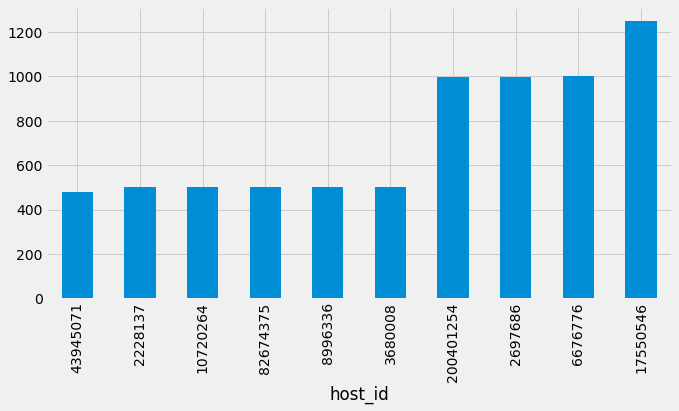

In [ ]:
# Let us visualise top 10 busy hosts to find busiest host using bar plot.
plt.rcParams['figure.figsize']=(10,5)
Top_busy_hosts.plot(kind='bar')
plt.title=('Top_busy_host')
plt.ylabel=('minimum_nights')
plt.xlabel=('host_id')
plt.show

From above bar plot it is observed that host with host_id 17550546 is busiest host in given dataset as number of minimum nights spend at listings belongs to host id 17550546 are more.

* Noticeable difference in traffic among different areas 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.ioff>

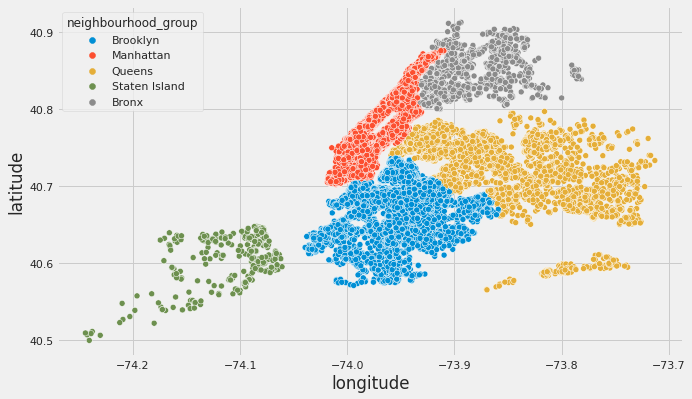

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff

**bold text**# Majority of traffic(listings) are observed in Queens and Brooklyn followed by Manhatten.

In [ ]:
# Let us find noticeable difference in traffic among different areas using neighbourhood,price,availability for 365 days and number of reviews columns.

In [ ]:
top_listing_area = airbnb['neighbourhood'].value_counts().head(20)
top_listing_area

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: neighbourhood, dtype: int64

In [ ]:
price_of_listing=airbnb.groupby(['neighbourhood']).price.mean()
price_of_listing=price_of_listing.sort_values(ascending=True)
price_of_listing

neighbourhood
Bull's Head        47.333333
Hunts Point        50.500000
Tremont            51.545455
Soundview          53.466667
New Dorp           57.000000
                     ...    
Riverdale         442.090909
Sea Gate          487.857143
Tribeca           490.638418
Woodrow           700.000000
Fort Wadsworth    800.000000
Name: price, Length: 221, dtype: float64

From above it is clear that price and number of listings in perticular neighbourhood have no relation 

In [ ]:
# Let us check wheather availability over year have any effect on number of listings in perticular area.
availability_in_year=airbnb.groupby(['neighbourhood']).availability_365.sum()
availability_in_year=availability_in_year.sort_values(ascending=False)
availability_in_year

neighbourhood
Bedford-Stuyvesant            433181
Williamsburg                  292913
Harlem                        283283
Hell's Kitchen                271862
Midtown                       243652
                               ...  
Westerleigh                      225
Rossville                         59
New Dorp                           0
Bay Terrace, Staten Island         0
Woodrow                            0
Name: availability_365, Length: 221, dtype: int64

From above it is observed that listings in top_listing_area are available over year.

In [ ]:
# Let us check wheather number_of_reviews have any effect on traffic in perticular area.
maximum_reviews=airbnb.groupby(['neighbourhood']).number_of_reviews.sum()
maximum_reviews=maximum_reviews.sort_values(ascending=False)
maximum_reviews 

neighbourhood
Bedford-Stuyvesant            110352
Williamsburg                   85427
Harlem                         75962
Bushwick                       52514
Hell's Kitchen                 50227
                               ...  
Breezy Point                       5
Bay Terrace, Staten Island         3
New Dorp                           0
Woodrow                            0
Fort Wadsworth                     0
Name: number_of_reviews, Length: 221, dtype: int64

From above result it is observed that number_of_reviews have strong impact on traffic among different area.

* Most expensive neighbourhood group


In [ ]:
most_expensive_area=airbnb.groupby(['neighbourhood_group']).price.mean()
most_expensive_area=most_expensive_area.sort_values(ascending=False)
most_expensive_area


neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

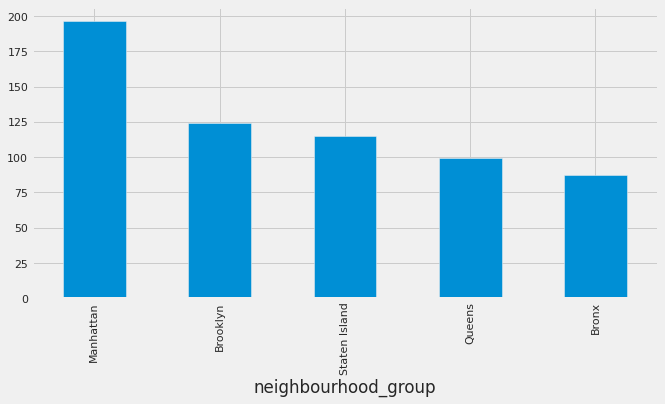

In [ ]:
# Let us visualise most_expensive_area using bar plot
most_expensive_area.plot(kind='bar')
plt.title=('most_expensive_area')
plt.xlable=('neighbourhood_group')
plt.ylable=('price')

from above bar plot it is observed that Manhattan is most expensive area in given dataset

* Room type available per neighbourhood group in airbnb dataset

In [ ]:
room_type=airbnb.groupby(['room_type']).room_type.count()
room_type=room_type.sort_values(ascending=False)
room_type

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Let us visualise room types available in dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



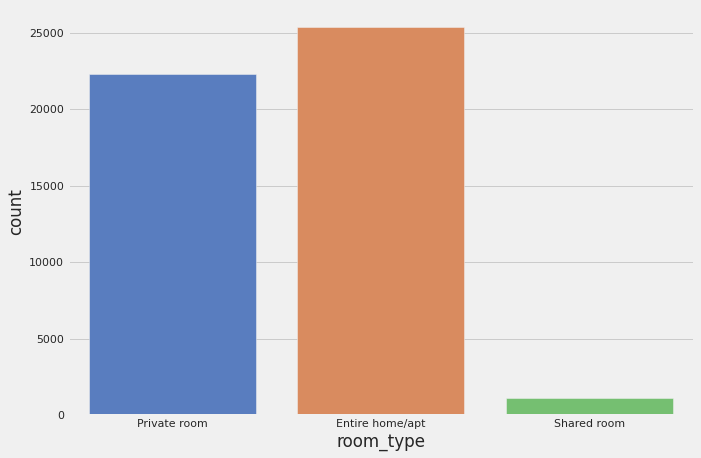

In [ ]:
plt.figure(figsize=(10,7))
plt.title=("Type of rooms")
sns.countplot(airbnb.room_type, palette='muted')
fig = plt.gcf()
plt.show()

From above count plot it is observed that Entire home/Apartment has heighest share,followed by private room and least prefered is shared room 

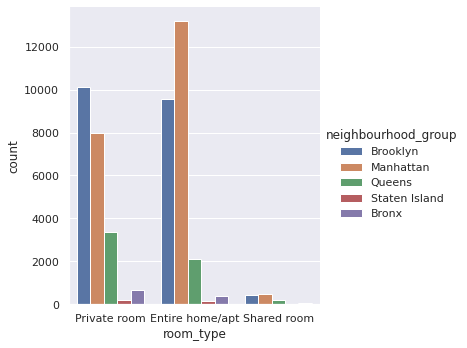

In [ ]:
# Let us visualise room_type location per neighbourhood group
sns.set(rc={'figure.figsize':(10,10)})
title='Room types location per neighbourhood group'
sns.catplot(x='room_type',kind='count',hue='neighbourhood_group',data=airbnb);
plt.title=(title)
plt.ioff()


Majority of entire home/apartment are located in Manhattan

Majority of private rooms are located in brooklyn

Relation between neighbourhood group and availability of room


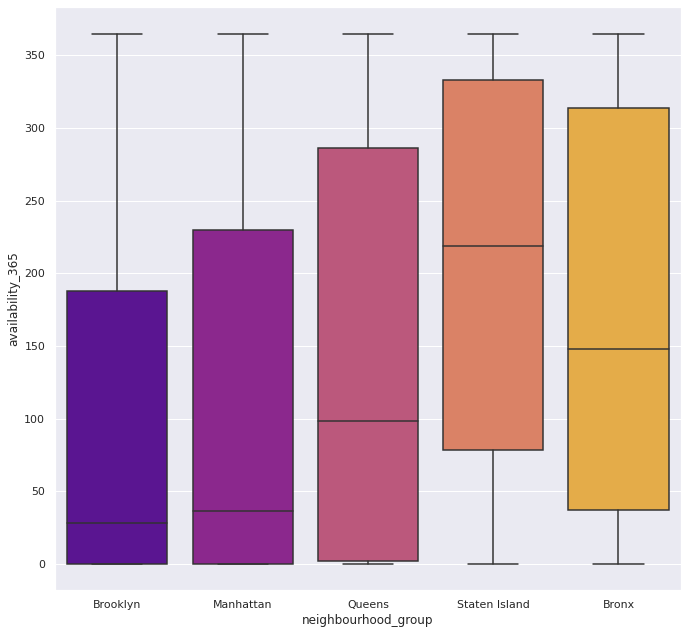

In [ ]:
# Let us visualise relationship  between neighbourhood group and availability 365 using boxplot
plt.figure (figsize= (10,10))
ax= sns.boxplot(data=airbnb,x='neighbourhood_group',y='availability_365',palette='plasma')

Above plot shows relation between neighbourhood_group and availability_365